In [1]:
#Classification Stock Prices  with Keras LTSM Network

from pandas import read_csv
from pandas import datetime
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import library as mio



Using TensorFlow backend.
j:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
j:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
# reduced list only the most correlated
indices_list_Complete = ["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB", "EUR","AUD","GBP","JPY", "SILVER", "GOLD", "WT1010"] # reduced list only the most correlated
indice_target=["^GSPC"]

In [25]:
start_date = "2003-01-01" # Start day of Series
end_date = "2017-01-01"	  # Final day of series
dates = pd.date_range(start_date, end_date)  # date range as index

In [26]:
df_index = mio.get_data(indices_list_Complete, dates)
df_target= mio.get_data(indice_target, dates)

In [27]:
df_index.fillna(method='bfill', inplace=True)
df_target.fillna(method='bfill', inplace=True)

In [28]:
df_index.describe()

,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,124.247170,2887.485241,12676.749688,6792.847443,5650.849134,4130.124744,12944.451194,19392.780442,4716.324737,70.492837,0.784911,1.218466,0.605921,103.269039,16.829385,993.989504,2.667827
std,42.716304,1111.738679,3019.752104,2287.728860,879.576705,772.017335,3478.880031,4632.425945,855.962899,29.223703,0.073974,0.180926,0.066218,13.772426,8.778454,427.903735,1.383519
min,57.440272,1268.640015,6547.049805,2202.959961,3287.000000,2403.040039,7054.979980,8409.009766,2700.399902,22.480000,0.625360,0.906698,0.474330,75.751979,4.370000,319.750000,-0.200000
25%,93.528227,2094.139893,10444.370117,4998.160156,5053.200195,3580.479980,9844.589844,15413.429688,4169.500000,45.250000,0.734626,1.071435,0.550249,92.727524,10.770000,611.250000,1.520000
50%,112.113904,2480.330078,12105.549805,6534.970215,5808.799805,4038.699951,11944.299805,20672.390625,4807.399902,66.340000,0.772966,1.237935,0.616478,105.553327,15.860000,1081.100000,3.150000
75%,152.589273,3496.429932,15112.190430,8260.480469,6364.700195,4582.830078,16024.849609,22835.820312,5342.399902,101.890000,0.829636,1.341054,0.643910,115.820209,20.020000,1308.250000,3.910000
max,225.444643,5487.439941,19974.619141,12374.730469,7142.799805,6168.149902,20868.029297,31638.220703,6828.700195,140.730000,0.963904,1.776110,0.822470,125.630900,48.700000,1891.000000,4.690000


In [29]:
colums_1=df_index.columns

In [30]:
for index in colums_1:
    df_index[index+'_Ret'] = df_index[index].pct_change(1)
    df_index.drop(index,axis=1, inplace=True)

In [31]:
df_index.replace([np.inf, -np.inf], np.nan)
df_index[df_index==np.inf] = np.nan
df_index[df_index==-np.inf] = np.nan
df_index.fillna(method='bfill', inplace=True)

In [32]:
df_index.describe()

,SPY_Ret,^IXIC_Ret,^DJI_Ret,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,0.000405,0.000472,0.000296,0.000471,0.000231,0.000220,0.000341,0.000359,0.000236,0.000321,0.000011,-0.000040,0.000089,0.000009,0.000604,0.000420,-0.002273
std,0.011829,0.013110,0.011018,0.014207,0.011625,0.014227,0.015348,0.014816,0.010559,0.017367,0.005865,0.007932,0.005748,0.005649,0.022397,0.012036,0.183213
min,-0.098448,-0.091424,-0.078733,-0.074472,-0.088483,-0.090368,-0.114064,-0.136666,-0.097524,-0.084716,-0.031090,-0.049097,-0.031450,-0.036115,-0.170495,-0.085271,-3.000000
25%,-0.004187,-0.005483,-0.004262,-0.006168,-0.005039,-0.006589,-0.006627,-0.005922,-0.004710,-0.008782,-0.003242,-0.004329,-0.003059,-0.003001,-0.010110,-0.005659,-0.011538
50%,0.000730,0.000928,0.000505,0.000837,0.000307,0.000340,0.000000,0.000000,0.000368,0.000543,-0.000115,-0.000408,-0.000003,0.000026,0.000000,0.000317,0.000000
75%,0.005602,0.006871,0.005288,0.007436,0.005789,0.007399,0.008219,0.007064,0.005665,0.009836,0.003206,0.003811,0.002998,0.003140,0.012328,0.006895,0.009804
max,0.145198,0.118059,0.110803,0.114020,0.098387,0.111762,0.141503,0.143471,0.057896,0.136594,0.032361,0.096461,0.082558,0.031060,0.200557,0.100255,4.000000


In [33]:
colums_2=df_target.columns

In [34]:
for index in colums_2:
    df_target[index+'_Ret'] = df_target[index].pct_change(1)
    df_target.drop(index,axis=1, inplace=True)

In [35]:
df_target.replace([np.inf, -np.inf], np.nan)
df_target[df_target==np.inf] = np.nan
df_target[df_target==-np.inf] = np.nan
df_target.fillna(method='bfill', inplace=True)

In [36]:
df_target.describe()

,^GSPC_Ret
count,3525.000000
mean,0.000326
std,0.011888
min,-0.090350
25%,-0.004445
50%,0.000693
75%,0.005545
max,0.115800


In [52]:
df_final_1 = df_index.join(df_target)

In [53]:
df_final=df_final_1.copy()


In [54]:
def Label_Change2 (x):
    if x >= 0 :
        return 1

    return 0

In [55]:
df_final=df_final.applymap(Label_Change2)


In [56]:

columns=df_final.columns

In [58]:
values = df_final.values
train_size = int(len(values) * 0.66)
train, test = values[0:train_size], values[train_size:len(values)]
print('Observations: %d' % (len(values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3525
Training Observations: 2326
Testing Observations: 1199


In [60]:
df_test=df_final[train_size:len(values)]

In [61]:
indexs=df_test.index

In [62]:
indexs

DatetimeIndex(['2012-03-28', '2012-03-29', '2012-03-30', '2012-04-02',
               '2012-04-03', '2012-04-04', '2012-04-05', '2012-04-09',
               '2012-04-10', '2012-04-11',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1199, freq=None)

In [63]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]



In [64]:
test_y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
#train_XS = train_XS.reshape((train_XS.shape[0], 1, train_XS.shape[1]))
#test_XS = test_XS.reshape((test_XS.shape[0], 1, test_XS.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2326, 17) (2326,) (1199, 17) (1199,)


In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

In [95]:
# design network
# play around with learning rate and optimizer

model = Sequential()
model.add(Dense(1, input_dim=17, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(train_X, train_y, verbose=2, shuffle=False, validation_data=(test_X, test_y), epochs=250, batch_size=64)
#model.fit(train_XS, train_yS, epochs=250, batch_size=16, validation_data=(test_XS, test_yS), verbose=2, shuffle=False)

Train on 2326 samples, validate on 1199 samples
Epoch 1/250
 - 0s - loss: 0.3670 - acc: 0.8672 - val_loss: 0.2179 - val_acc: 0.9283
Epoch 2/250
 - 0s - loss: 0.1910 - acc: 0.9407 - val_loss: 0.1565 - val_acc: 0.9516
Epoch 3/250
 - 0s - loss: 0.1626 - acc: 0.9454 - val_loss: 0.1383 - val_acc: 0.9550
Epoch 4/250
 - 0s - loss: 0.1545 - acc: 0.9463 - val_loss: 0.1296 - val_acc: 0.9558
Epoch 5/250
 - 0s - loss: 0.1508 - acc: 0.9471 - val_loss: 0.1245 - val_acc: 0.9558
Epoch 6/250
 - 0s - loss: 0.1488 - acc: 0.9475 - val_loss: 0.1213 - val_acc: 0.9558
Epoch 7/250
 - 0s - loss: 0.1477 - acc: 0.9475 - val_loss: 0.1192 - val_acc: 0.9550
Epoch 8/250
 - 0s - loss: 0.1471 - acc: 0.9471 - val_loss: 0.1178 - val_acc: 0.9558
Epoch 9/250
 - 0s - loss: 0.1467 - acc: 0.9475 - val_loss: 0.1168 - val_acc: 0.9558
Epoch 10/250
 - 0s - loss: 0.1464 - acc: 0.9475 - val_loss: 0.1161 - val_acc: 0.9566
Epoch 11/250
 - 0s - loss: 0.1462 - acc: 0.9480 - val_loss: 0.1156 - val_acc: 0.9558
Epoch 12/250
 - 0s - loss:

Epoch 97/250
 - 0s - loss: 0.1461 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 98/250
 - 0s - loss: 0.1461 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 99/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 100/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 101/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 102/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 103/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 104/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 105/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 106/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 107/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 108/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_lo

Epoch 193/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 194/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 195/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 196/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 197/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 198/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 199/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 200/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 201/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 202/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 203/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val_loss: 0.1140 - val_acc: 0.9566
Epoch 204/250
 - 0s - loss: 0.1462 - acc: 0.9467 - val

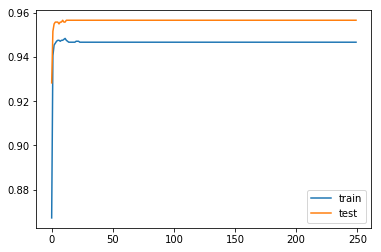

In [98]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show() 

In [99]:
# make a prediction
y_test_pred = model.predict_classes(test_X)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report


In [101]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [102]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down'])

,Predicted UP,Predicted Down
UP,529,35
Down,17,618


In [103]:
print(classification_report(test_y, y_test_pred))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       564
          1       0.95      0.97      0.96       635

avg / total       0.96      0.96      0.96      1199

